# Chapter 7 

Q5.

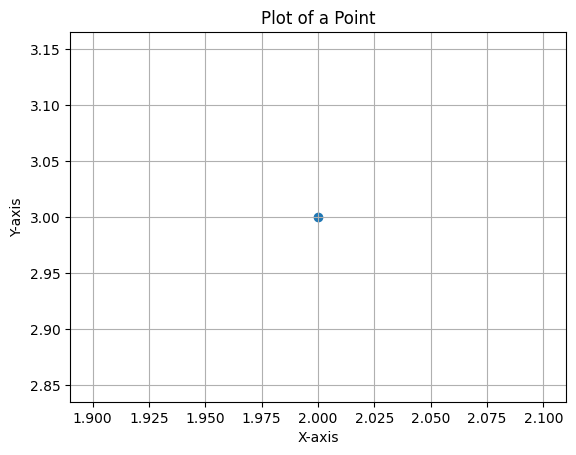

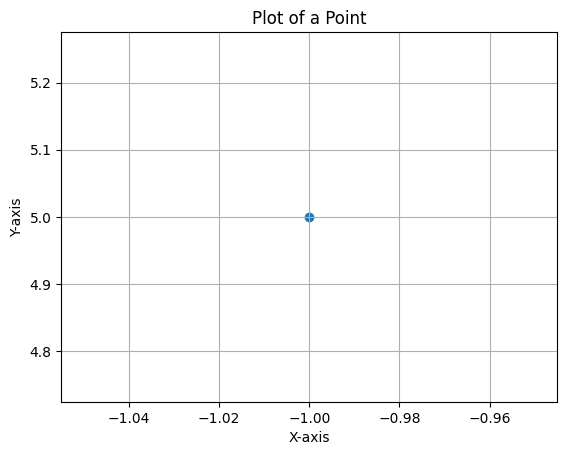

In [7]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def plot_point(self):
        plt.scatter(self.x, self.y)
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.title("Plot of a Point")
        plt.grid(True)
        plt.show()

point1 = Point(2, 3)
point1.plot_point()

point2 = Point(-1, 5)
point2.plot_point()

Q6.

The distance between point1 and point2 is: 5.0
The distance between point1 and (6, 1) is: 4.47213595499958


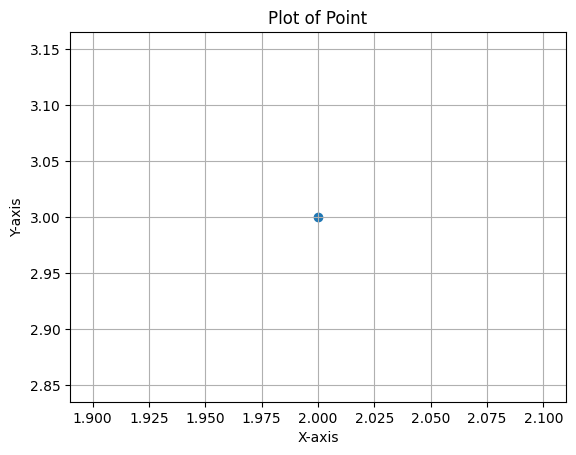

In [8]:
import math
import matplotlib.pyplot as plt 

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def plot_point(self):
        """Plots the point using Matplotlib."""
        plt.scatter(self.x, self.y) 
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.title("Plot of Point")
        plt.grid(True) 
        plt.show()

    def calculate_dist(self, other_x, other_y):
        """Calculates the Euclidean distance to another point."""
        dx = self.x - other_x
        dy = self.y - other_y
        return math.sqrt(dx**2 + dy**2) 
point1 = Point(2, 3)
point2 = Point(5, 7)

distance = point1.calculate_dist(point2.x, point2.y)
print(f"The distance between point1 and point2 is: {distance}")

distance2 = point1.calculate_dist(6, 1)
print(f"The distance between point1 and (6, 1) is: {distance2}")

point1.plot_point()

Q7.

## Inheritance in Object-Oriented Programming

Inheritance is a powerful concept in OOP that allows you to create new classes (derived or child classes) based on existing classes (base or parent classes).  It promotes code reuse and a hierarchical structure.


# Chapter 8

Q7.

In [9]:
import timeit
import numpy as np
def my_fib_iter1(n):
    out = np.zeros(n)
    out[:2] = 1
    for i in range(2, n):
        out[i] = out[i-1] + out[i-2]
    return out

def my_fib_iter2(n):
    out = [1, 1]
    for i in range(2, n):
        out.append(out[i-1]+out[i-2])
    return np.array(out)

#Enable the line profiler
%load_ext line_profiler

#Run line_profiler on the functions
n = 10000 
%lprun -f my_fib_iter1 my_fib_iter1(n)
%lprun -f my_fib_iter2 my_fib_iter2(n)

#Measure runtime using %timeit
%timeit my_fib_iter1(n)
%timeit my_fib_iter2(n)

ModuleNotFoundError: No module named 'line_profiler'

# Chapter 9

Q2.  Write a function my_dec_2_bin(d) where d is a positive integer in decimal, and b is the binary
 representation of d. The output b must be a list of ones and zeros, and the leading term must be a
 1 unless the decimal input value is 0. Test cases are provided below.

In [10]:
def my_dec_2_bin(d):

    if d == 0:
        return [0]

    binary_digits = []
    while d > 0:
        remainder = d % 2 
        binary_digits.insert(0, remainder) 
        d //= 2 

    return binary_digits


print(my_dec_2_bin(0))   # Output: [0]
print(my_dec_2_bin(1))   # Output: [1]
print(my_dec_2_bin(2))   # Output: [1, 0]
print(my_dec_2_bin(3))   # Output: [1, 1]

[0]
[1]
[1, 0]
[1, 1]


Q3. Use the two functions you wrote in Problems 1 and 2 to compute
 d = my_bin_2_dec(my_dec_2_bin(12654)). Do you get the same number?

In [11]:
def my_bin_2_dec(binary_string):

    decimal_value = 0
    power = 0
    for digit in reversed(binary_string):  # Iterate from right to left
        if digit == '1':
            decimal_value += 2**power
        power += 1
    return decimal_value


decimal_number = 12654
binary_representation = my_dec_2_bin(decimal_number)
print(f"Binary representation of {decimal_number}: {binary_representation}")

reconverted_decimal = my_bin_2_dec(binary_representation)
print(f"Decimal value of {binary_representation}: {reconverted_decimal}")

d = my_bin_2_dec(my_dec_2_bin(12654))

print(f"d = {d}")
print(f"Are the original and final numbers the same? {decimal_number == d}")

Binary representation of 12654: [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
Decimal value of [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]: 0
d = 0
Are the original and final numbers the same? False


Q4.

In [12]:
def my_bin_adder(b1, b2):
    max_len = max(len(b1), len(b2))
    b1 = b1.zfill(max_len)
    b2 = b2.zfill(max_len)
    result = ""
    carry = 0

    for i in range(max_len - 1, -1, -1):  
        digit1 = int(b1[i])
        digit2 = int(b2[i])

        current_sum = digit1 + digit2 + carry

        result = str(current_sum % 2) + result  
        carry = current_sum // 2  

    if carry:  
        result = str(carry) + result

    if len(result) > 1 and result[0] == '0':
        first_one_index = -1
        for i in range(len(result)):
            if result[i] == '1':
                first_one_index = i
                break
        if first_one_index != -1:
            result = result[first_one_index:]
        else:
            result = "0" 
    return result
bin1 = "101101"
bin2 = "11011"
sum_bin = my_bin_adder(bin1, bin2)
print(f"The sum of {bin1} and {bin2} is: {sum_bin}")

The sum of 101101 and 11011 is: 1001000


Q6.

In [13]:
import struct

def my_ieee_2_dec(ieee):
    if len(ieee) != 64:
        raise ValueError("IEEE 754 string must be 64 bits long.")
    
    # Use struct.unpack for efficient conversion
    try:
        d = struct.unpack(">d", bytes.fromhex(hex(int(ieee, 2))[2:].zfill(16)))[0]
        return d
    except Exception as e:
        raise ValueError(f"Error during conversion: {e}")


# Example usage:
ieee_binary = "0100000001111011011010000000000000000000000000000000000000000000"  # Example IEEE 754 representation (123.45)
decimal_value = my_ieee_2_dec(ieee_binary)
print(f"Decimal value: {decimal_value}")

Decimal value: 438.5


Q7.

In [14]:
import struct

def my_dec_2_ieee(d):
    try:
        packed_data = struct.pack(">d", d)

        hex_representation = packed_data.hex()

        binary_representation = bin(int(hex_representation, 16))[2:].zfill(64)  # [2:] removes "0b" prefix and zfill pads with 0s to 64 bits

        return binary_representation

    except Exception as e:
        raise ValueError(f"Error during conversion: {e}")



# Example usage:
decimal_number = 123.45
ieee_binary = my_dec_2_ieee(decimal_number)
print(f"IEEE 754 representation of {decimal_number}: {ieee_binary}")

IEEE 754 representation of 123.45: 0100000001011110110111001100110011001100110011001100110011001101


# Chapter 14

Q3.

In [15]:
import numpy as np

def my_is_similar(s1, s2, tol):
    def char_counts(s):
        v = np.zeros(26)  # Initialize a vector of 26 zeros
        for char in s.lower():  # Convert to lowercase for case-insensitivity
            if 'a' <= char <= 'z':
                v[ord(char) - ord('a')] += 1
        return v

    v1 = char_counts(s1)
    v2 = char_counts(s2)

    # Handle the case where either vector is the zero vector (to avoid division by zero):
    if np.linalg.norm(v1) == 0 or np.linalg.norm(v2) == 0:
        angle = 0.0 if np.linalg.norm(v1) == 0 and np.linalg.norm(v2) == 0 else np.pi/2 #If both are zero, angle is 0. Otherwise, it's pi/2
    else:
      # Calculate the cosine of the angle between v1 and v2:
      cosine_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
      cosine_theta = np.clip(cosine_theta, -1.0, 1.0) #to avoid math domain errors
      angle = np.arccos(cosine_theta)
      
    if abs(angle) < tol:
        return 1
    else:
        return 0


# Example usage:
s1 = "Hello World"
s2 = "world hello"
tol = 0.1
result = my_is_similar(s1, s2, tol)
print(f"Strings '{s1}' and '{s2}' are similar (tolerance {tol}): {result}")  # Output: 1

Strings 'Hello World' and 'world hello' are similar (tolerance 0.1): 1


Q4.

In [16]:
import numpy as np

def my_make_lin_ind(A):
    if A.size == 0:  # Handle empty matrix case
        return np.array([])

    rank_A = np.linalg.matrix_rank(A)
    if rank_A == 0:  # Handle rank 0 matrix
      return np.array([])
      
    B = np.array([])  # Initialize B

    cols_checked = 0
    for i in range(A.shape[1]):
        if cols_checked == rank_A:
          break

        current_cols = A[:, :i+1] # Columns up to and including i.
        if i == 0 or np.linalg.matrix_rank(current_cols) == i+1: #If it's the first column or adding it increases the rank...
            if B.size == 0: #If B is empty, initialize it.
              B = A[:, i].reshape(-1,1) #Reshape to make it a column vector
            else:
              B = np.hstack((B, A[:, i].reshape(-1,1))) #Add the column.
            cols_checked += 1


    return B
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = my_make_lin_ind(A)
print("Matrix B (linearly independent columns):")
print(B)

Matrix B (linearly independent columns):
[[1 2]
 [4 5]
 [7 8]]


Q12.

In [18]:
import numpy as np

def my_flow_calculator(S, d):
    """Calculates power flows in a network.

    Args:
        S: A 1x2 NumPy array representing the capacities of the power supply stations.
        d: A 1x5 NumPy array representing the power demands at each node.

    Returns:
        A 1x7 NumPy array representing the power flows in the network.
        Returns None if no solution is found.
    """

    incidence_matrix = np.array([
        [1, -1, 0, 0, 0, 0, 0],  # S1
        [0, 1, -1, 1, 0, 0, 0],  # N1
        [0, 0, 1, 0, -1, 0, 0],  # N2
        [0, 0, 0, -1, 1, -1, 0],  # N3
        [0, 0, 0, 0, 0, 1, -1],  # N4
        [-1, 0, 0, 0, 0, 0, 1],  # S2
        [0, 0, 0, 0, 0, 0, 0]   # N5 (dummy row for demand constraint)
    ])

    Aeq = incidence_matrix[[0, 5], :]  # Rows for S1 and S2
    beq = S.reshape(2, 1)  # Reshape S to (2, 1)

    Aeq_demand = incidence_matrix[1:6, :]  # Rows for N1 to N5
    beq_demand = d.reshape(5, 1)  # Reshape d to (5, 1)

    Aeq = np.vstack([Aeq, Aeq_demand])
    beq = np.vstack([beq, beq_demand])

    try:
        f = np.linalg.lstsq(Aeq, beq, rcond=None)[0].reshape(1, 7)
        return f
    except np.linalg.LinAlgError:
        return None


# Test cases (same as before):
s = np.array([[10, 10]])
d = np.array([[4, 4, 4, 4, 4]])
f = my_flow_calculator(s, d)
if f is not None:
    print(f"Flows (f): {f}")
else:
    print("No solution found.")

s = np.array([[10, 10]])
d = np.array([[3, 4, 5, 4, 4]])
f = my_flow_calculator(s, d)
if f is not None:
    print(f"Flows (f): {f}")
else:
    print("No solution found.")

s = np.array([[10, 10]])
d = np.array([[5, 5, 5, 0, 5]])  # Added test case.
f = my_flow_calculator(s, d)
if f is not None:
    print(f"Flows (f): {f}")
else:
    print("No solution found.")

s = np.array([[10, 10]])
d = np.array([[10, 0, 0, 0, 10]])  # Added test case.
f = my_flow_calculator(s, d)
if f is not None:
    print(f"Flows (f): {f}")
else:
    print("No solution found.")

s = np.array([[10, 10]])
d = np.array([[10, 10, 0, 0, 0]])  # Added test case.
f = my_flow_calculator(s, d)
if f is not None:
    print(f"Flows (f): {f}")
else:
    print("No solution found.")

Flows (f): [[-0.28571429 -4.28571429 -1.42857143  0.85714286  0.57142857  1.71428571
   3.71428571]]
Flows (f): [[-0.42857143 -4.42857143 -1.14285714  0.28571429  0.85714286  1.57142857
   3.57142857]]
Flows (f): [[ 0.58441558 -3.50649351 -1.16883117  1.42857143 -0.25974026 -0.77922078
   5.12987013]]
Flows (f): [[-0.06493506 -4.61038961 -4.87012987  4.28571429  0.58441558  1.75324675
   7.20779221]]
Flows (f): [[ 2.66233766 -0.97402597 -0.32467532  4.28571429 -3.96103896 -1.88311688
   4.48051948]]
